<a href="https://colab.research.google.com/github/Rithvikns/Causality-Mining/blob/main/Linear_Causality_Mining/Granger_Causality/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

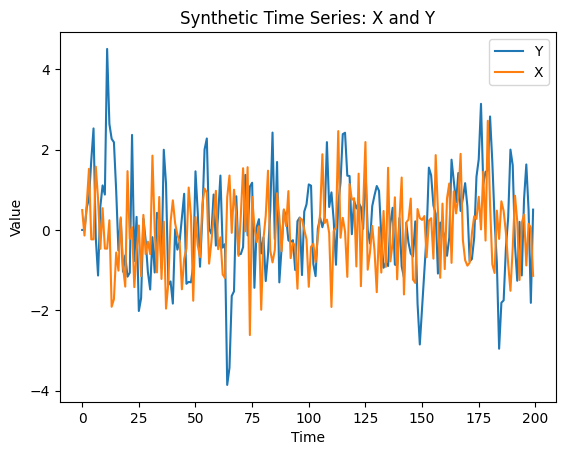

ADF Statistic for X: -14.744
p-value: 0.000

ADF Statistic for Y: -8.307
p-value: 0.000


== Granger Causality Test ==

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1797  , p=0.6721  , df_denom=196, df_num=1
ssr based chi2 test:   chi2=0.1824  , p=0.6693  , df=1
likelihood ratio test: chi2=0.1824  , p=0.6694  , df=1
parameter F test:         F=0.1797  , p=0.6721  , df_denom=196, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=22.9999 , p=0.0000  , df_denom=193, df_num=2
ssr based chi2 test:   chi2=47.1915 , p=0.0000  , df=2
likelihood ratio test: chi2=42.3270 , p=0.0000  , df=2
parameter F test:         F=22.9999 , p=0.0000  , df_denom=193, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=15.3385 , p=0.0000  , df_denom=190, df_num=3
ssr based chi2 test:   chi2=47.7109 , p=0.0000  , df=3
likelihood ratio test: chi2=42.7241 , p=0.0000  , df=3
parameter F test:         F=15.3385 , p=0.0000  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(0.17969074499105564),
    np.float64(0.6721039939439908),
    np.float64(196.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.18244111353683712),
    np.float64(0.6692837252293933),
    np.int64(1)),
   'lrtest': (np.float64(0.182357534565881),
    np.float64(0.6693549921455466),
    np.int64(1)),
   'params_ftest': (np.float64(0.17969074499109458),
    np.float64(0.6721039939439533),
    np.float64(196.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(22.999920988695788),
    np.float64(1.0987795996123225e-09),
    np.float64(193.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(47.1915477281012),
    np.float64(5.655690231001219e-11),
    np.int64(2)),
   'lrtest': (np.float64(42.326994965100994),
    np.float64(6.43887250155389e-10),
    np.int64(2)),
   'params_ftest': (np.float64(22.99992098869579),
    np.float64(1.0987795996123225e-09),
    np.float64(193.0),
    2.0)},
   array([[0., 0., 1., 0.,

In [1]:
# Granger Causality Test in Python (Google Colab)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

# Step 1: Generate synthetic time series data
np.random.seed(42)
n = 200

# X is random noise
X = np.random.normal(size=n)

# Y is influenced by past values of X (Granger-caused)
Y = np.zeros(n)
for t in range(2, n):
    Y[t] = 0.5 * Y[t-1] + 0.4 * X[t-2] + np.random.normal()

# Combine into DataFrame
data = pd.DataFrame({'Y': Y, 'X': X})

# Plot the series
data.plot(title='Synthetic Time Series: X and Y')
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Step 2: Check stationarity (ADF Test)
def adf_test(series, name):
    result = adfuller(series)
    print(f'ADF Statistic for {name}: {result[0]:.3f}')
    print(f'p-value: {result[1]:.3f}\n')

adf_test(data['X'], 'X')
adf_test(data['Y'], 'Y')

# Step 3: Perform Granger Causality Test
print("\n== Granger Causality Test ==")
max_lag = 4
grangercausalitytests(data[['Y', 'X']], maxlag=max_lag, verbose=True)
